## Assignment 09

Cong Chen 
<br>
G43265951

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Q1

In [2]:
# Read data
mydf = pd.read_csv("https://s3.amazonaws.com/programmingforanalytics/repeater_prediction.csv")

In [3]:
# Show first 5 rows of the data
mydf.head()

,repeater,chain,market,offervalue,avg_category_quantity,avg_category_amount,exact_item_bought
0,0,15,9,0.75,0.000000,0.000000,0
1,0,14,8,1.25,1.333333,4.653333,1
2,0,4,1,0.75,0.000000,0.000000,0
3,0,15,9,0.75,0.000000,0.000000,0
4,0,17,4,0.75,0.000000,0.000000,0


In [4]:
# See the number of rows and columns
mydf.shape

(47955, 7)

In [5]:
# Summary Statistics
print(mydf.describe())

           repeater        market    offervalue  avg_category_quantity  \
count  47955.000000  47955.000000  47955.000000           47955.000000   
mean       0.274799     19.799917      1.256892               0.692271   
std        0.446418     18.907783      0.526631               0.756085   
min        0.000000      1.000000      0.750000               0.000000   
25%        0.000000     10.000000      0.750000               0.000000   
50%        0.000000     14.000000      1.000000               1.000000   
75%        1.000000     24.000000      1.500000               1.068182   
max        1.000000     96.000000      3.000000              20.421053   

       avg_category_amount  exact_item_bought  
count         47955.000000       47955.000000  
mean              2.240992           0.505015  
std               2.592410           0.499980  
min              -9.370000           0.000000  
25%               0.000000           0.000000  
50%               2.063333           1.000000

In [6]:
# Frequency Table
print(pd.value_counts(mydf.repeater))

0    34777
1    13178
Name: repeater, dtype: int64


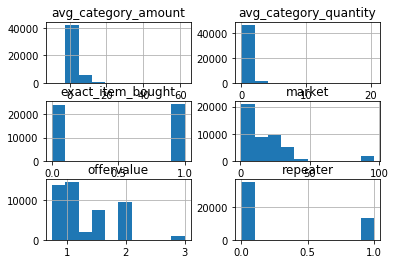

In [7]:
# Plots
mydf.hist()
plt.show()

### Q2

In [8]:
# Check data types
mydf.dtypes

repeater                   int64
chain                     object
market                     int64
offervalue               float64
avg_category_quantity    float64
avg_category_amount      float64
exact_item_bought          int64
dtype: object

In [9]:
# Check Null value
mydf.isnull().sum()

repeater                 0
chain                    0
market                   0
offervalue               0
avg_category_quantity    0
avg_category_amount      0
exact_item_bought        0
dtype: int64

In [10]:
# Reset data types
mydf["market"] = mydf["market"].astype(object)

In [11]:
mydf.dtypes

repeater                   int64
chain                     object
market                    object
offervalue               float64
avg_category_quantity    float64
avg_category_amount      float64
exact_item_bought          int64
dtype: object

In [12]:
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression

# Create matrices
y, x = dmatrices('repeater ~ chain + market + offervalue + avg_category_quantity + avg_category_amount + exact_item_bought',
                mydf, return_type = 'dataframe')
y = np.ravel(y)

In [13]:
print(x)

       Intercept  chain[T.100]  chain[T.101]  chain[T.104]  chain[T.106]  \
0            1.0           0.0           0.0           0.0           0.0   
1            1.0           0.0           0.0           0.0           0.0   
2            1.0           0.0           0.0           0.0           0.0   
3            1.0           0.0           0.0           0.0           0.0   
4            1.0           0.0           0.0           0.0           0.0   
5            1.0           0.0           0.0           0.0           0.0   
6            1.0           0.0           0.0           0.0           0.0   
7            1.0           0.0           0.0           0.0           0.0   
8            1.0           0.0           0.0           0.0           0.0   
9            1.0           0.0           0.0           0.0           0.0   
10           1.0           0.0           0.0           0.0           0.0   
11           1.0           0.0           0.0           0.0           0.0   
12          

In [14]:
# sklearn output
model = LogisticRegression()
mdl = model.fit(x,y)
model.score(x,y)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7267438223334376

In [15]:
import statsmodels.discrete.discrete_model as sm
logit = sm.Logit(y,x)
logit.fit().params

         Current function value: 0.563011
         Iterations: 35


/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Intercept                -1.753442
chain[T.100]              2.852681
chain[T.101]              0.471489
chain[T.104]             -4.294384
chain[T.106]              3.719462
chain[T.108]              3.887876
chain[T.109]              0.030509
chain[T.115]             -7.826105
chain[T.116]              0.123830
chain[T.12]               0.349968
chain[T.122]             -0.074384
chain[T.126]              0.327956
chain[T.133]              0.282063
chain[T.134]             -0.989845
chain[T.14]              -0.149340
chain[T.140]              0.223765
chain[T.143]              0.214218
chain[T.15]              17.021160
chain[T.151]              0.196058
chain[T.152]              4.182437
chain[T.153]              2.734575
chain[T.16]               3.972564
chain[T.161]             14.727942
chain[T.165]             -0.219111
chain[T.166]              1.128649
chain[T.169]              0.375365
chain[T.17]              -0.196631
chain[T.18]               0.255610
chain[T.180]        

In [16]:
y.mean()

0.274799291001981

### Q3

In [17]:
import numpy as np
np.random.seed(0)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print(len(x_train))
print(len(x_test))

33568
14387


In [19]:
model2 = LogisticRegression()
model2.fit(x_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
predicted = model2.predict(x_test)
print (predicted)

[0. 0. 0. ... 0. 0. 0.]


In [21]:
myList = []
for i in range(len(predicted)):
    myList.append((int(y_test[i]),int(predicted[i])))
print(myList)

[(1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (1, 0), (0, 0), (1, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0),

In [22]:
# generate class probabilities
probs = model2.predict_proba(x_test)
print (len(probs))

14387


In [23]:
# generate evaluation metrics
from sklearn import metrics
print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

0.7241259470355181
0.6270219847211121


In [24]:
print (metrics.confusion_matrix(y_test, predicted))
print("-----------------")
print (metrics.classification_report(y_test, predicted))

[[10162   240]
 [ 3729   256]]
-----------------
              precision    recall  f1-score   support

         0.0       0.73      0.98      0.84     10402
         1.0       0.52      0.06      0.11      3985

   micro avg       0.72      0.72      0.72     14387
   macro avg       0.62      0.52      0.48     14387
weighted avg       0.67      0.72      0.64     14387



### Q4

In [26]:
# evaluate the model using 10-fold cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(), x, y, scoring='accuracy', cv=10)
print (scores)
print (scores.mean())

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

[0.72560467 0.70996664 0.72706422 0.72393661 0.6734779  0.74020017
 0.71830692 0.72387904 0.69816437 0.27534418]
0.6715944723966927
